In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("Loan Delinquent Dataset.csv")

In [4]:
df.head()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500
2,3,Yes,1,36 months,Female,House,Rent,>25,300-500
3,4,Yes,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,Yes,1,36 months,Female,House,Rent,>25,300-500


In [5]:
df.dtypes

ID                 int64
delinquent        object
Sdelinquent        int64
term              object
gender            object
purpose           object
home_ownership    object
age               object
FICO              object
dtype: object

In [6]:
df.term.value_counts()

term
36 months    10589
60 months      959
Name: count, dtype: int64

In [7]:
# Drop unwanted columns\(Method 1)
df=df.drop(columns=["ID", "delinquent"])


In [8]:
# Automatically select columns with object or category dtype(method 1)
categorical_columns = df.select_dtypes(include=['object']).columns

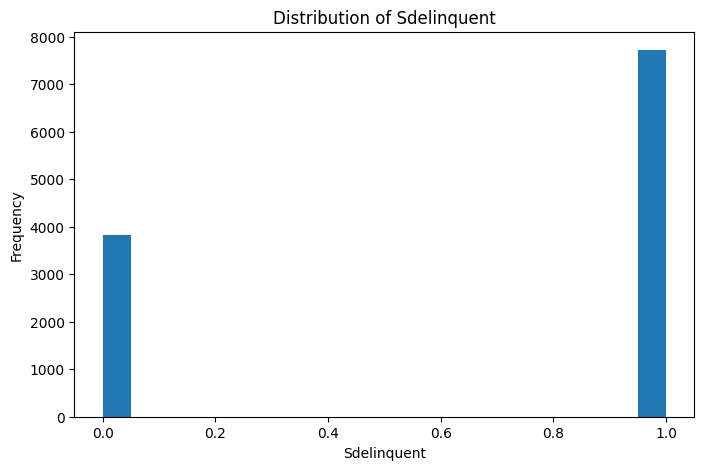

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df['Sdelinquent'], bins=20)
plt.xlabel('Sdelinquent')
plt.ylabel('Frequency')
plt.title('Distribution of Sdelinquent')
plt.show()

his histogram shows the distribution of the Sdelinquent variable, which is binary (0 and 1).

Most values are 1, while fewer are 0, indicating the data is imbalanced toward class 1.

In [10]:
# Preprocessing
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['term', 'gender', 'purpose', 'home_ownership', 
                       'age', 'FICO']
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])


In [11]:
df.head()

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,0,0,1,0,1,0
1,0,0,0,1,2,0,1
2,1,0,0,1,2,1,0
3,1,0,0,0,0,1,0
4,1,0,0,1,2,1,0


In [8]:
df.home_ownership.value_counts()

home_ownership
0    5461
2    5216
1     871
Name: count, dtype: int64

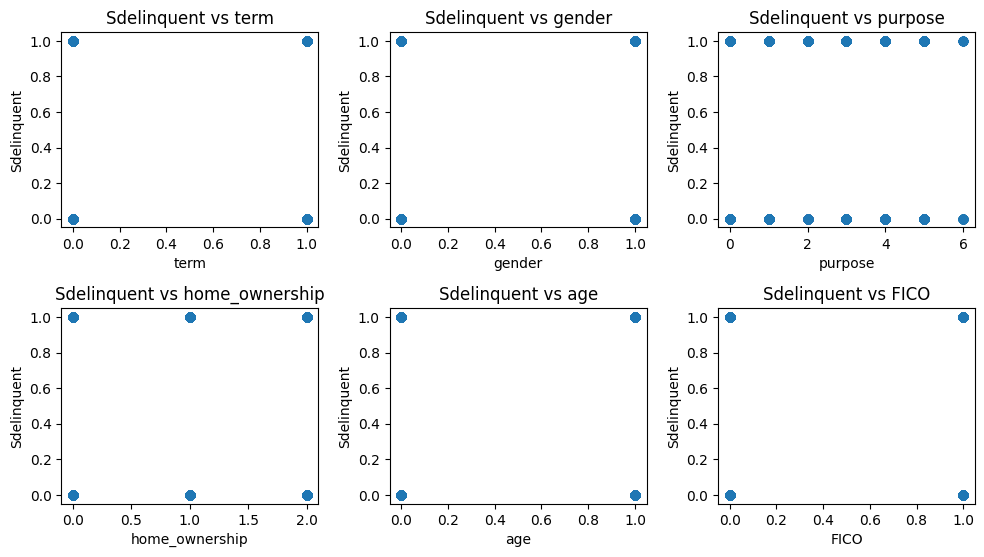

In [12]:
# target variable
y = df["Sdelinquent"]

# features (all except mpg)
X = df.drop("Sdelinquent", axis=1)

plt.figure(figsize=(10, 8))

# loop through each column and make subplots
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)      # adjust grid size (3x3 for 8 columns)
    plt.scatter(df[col], y)
    plt.xlabel(col)
    plt.ylabel("Sdelinquent")
    plt.title(f"Sdelinquent vs {col}")

plt.tight_layout()
plt.show()

delinquent vs Term Delinquent and non-delinquent cases appear across both loan terms. Loan term alone does not clearly distinguish delinquency. Sdelinquent vs Gender Both genders contain delinquent and non-delinquent customers. Gender does not show a strong impact on delinquency by itself. Sdelinquent vs Purpose Delinquency is present across all loan purpose categories. Loan purpose alone is not sufficient to predict delinquency. Sdelinquent vs Home Ownership All home ownership types show both delinquent and non-delinquent cases. Home ownership is not a strong standalone predictor. Sdelinquent vs Age Delinquency is distributed across different age values. Age alone cannot clearly separate delinquent customers. Sdelinquent vs FICO Both delinquent and non-delinquent cases overlap in FICO values. FICO is important, but not sufficient as a single feature. Overall Conclusion No single feature clearly explains delinquency. Combining multiple features will improve model performance.



In [13]:
corr = df.corr()
print(corr)


                Sdelinquent      term    gender   purpose  home_ownership  \
Sdelinquent        1.000000 -0.227456  0.072532 -0.017798        0.002451   
term              -0.227456  1.000000  0.262649  0.052666       -0.010659   
gender             0.072532  0.262649  1.000000 -0.068138        0.035470   
purpose           -0.017798  0.052666 -0.068138  1.000000       -0.104148   
home_ownership     0.002451 -0.010659  0.035470 -0.104148        1.000000   
age               -0.034327  0.079074 -0.364623  0.073096       -0.035844   
FICO              -0.432794  0.118622 -0.031348  0.031948       -0.056357   

                     age      FICO  
Sdelinquent    -0.034327 -0.432794  
term            0.079074  0.118622  
gender         -0.364623 -0.031348  
purpose         0.073096  0.031948  
home_ownership -0.035844 -0.056357  
age             1.000000  0.236542  
FICO            0.236542  1.000000  


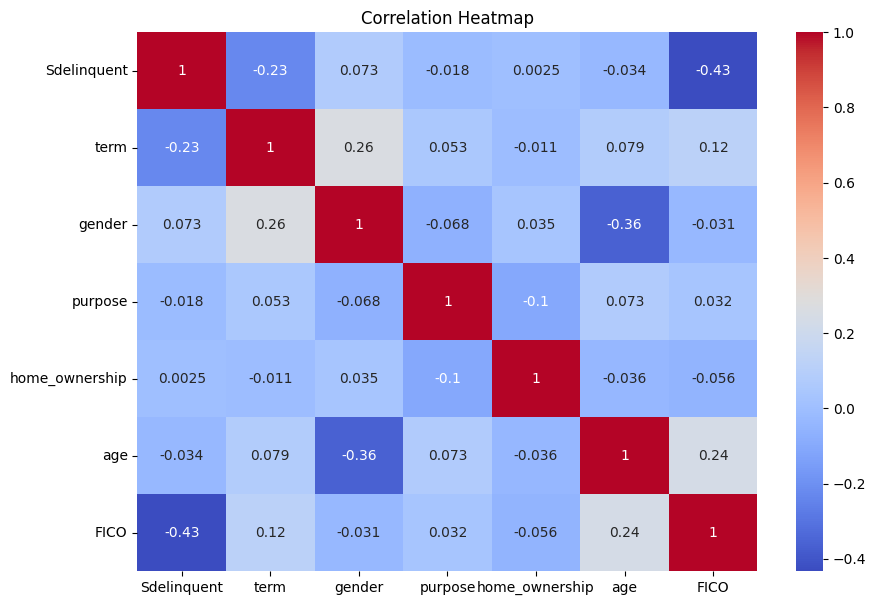

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

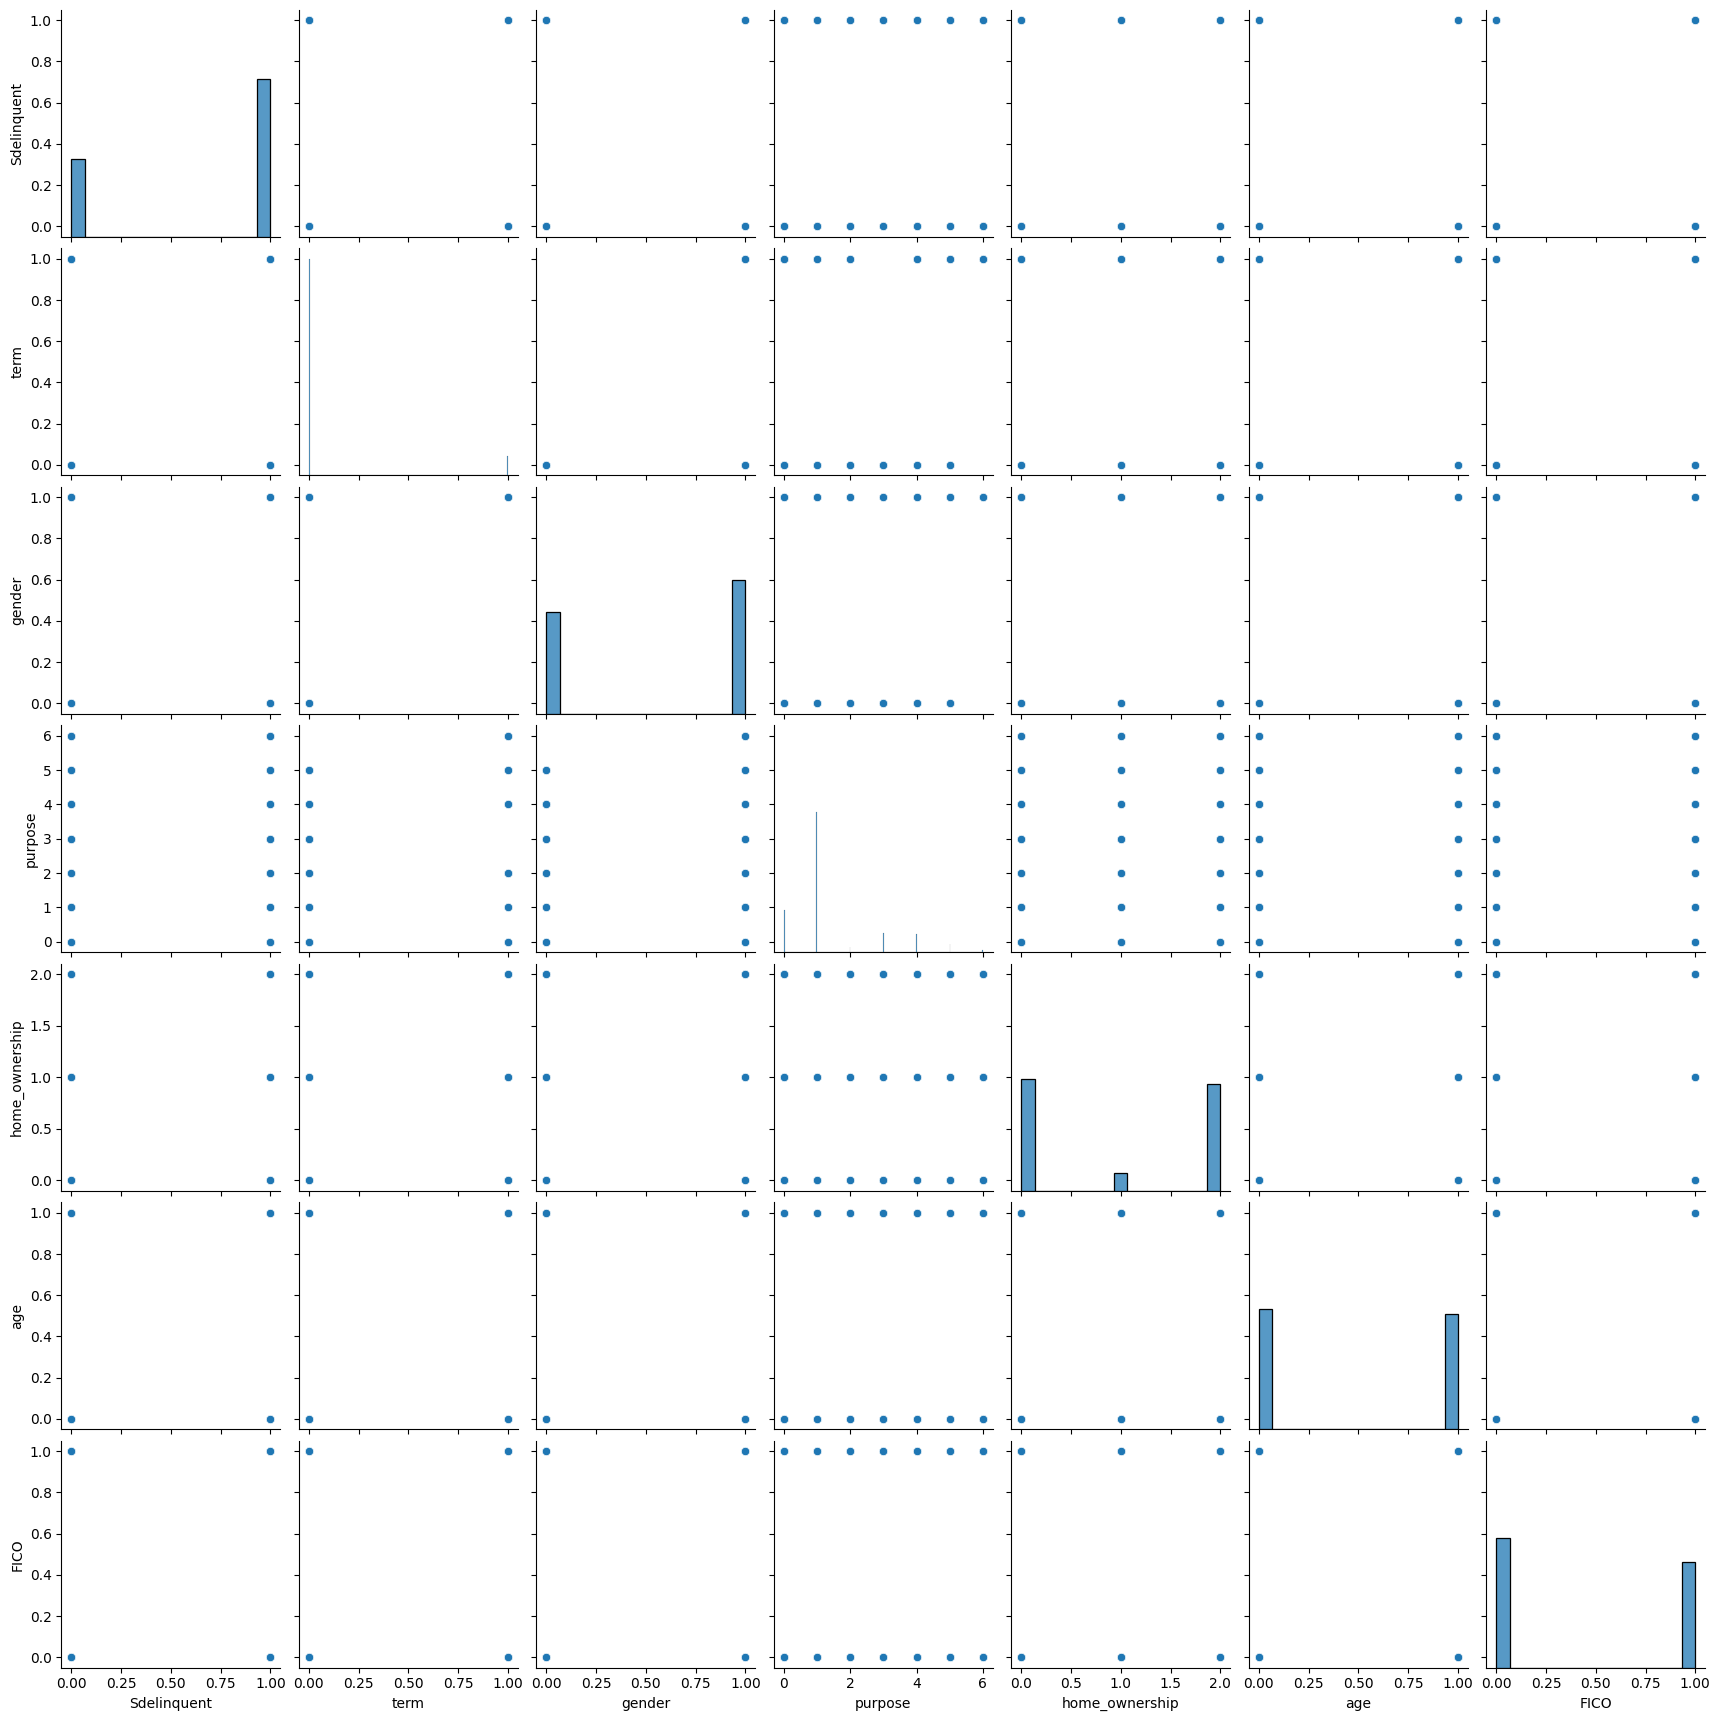

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
# Define features and target variable
X = df.drop(columns=["Sdelinquent"])
y = df["Sdelinquent"]


In [17]:
# Split the data into train and test:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=1)

In [18]:
# Training the model:
from sklearn.ensemble import RandomForestClassifier

# Initialize and Train the model
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
#Evaluate the model: ( Train data)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Make prediction on train
y_pred_train=model.predict(X_train)
# Evaluate the Model Train
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8534314786750379
Precision: 0.8780563775112911
Recall: 0.9080367208890321
F1 Score: 0.8927949326999208


In [20]:
#Make prediction on test
y_pred_test=model.predict(X_test)

# Evaluate the Model
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# recall=Out of actual positive (5 person) how many of them where predicted by the model
# recall(1)=True positive/True positve+ False Negative
# recall (or) Sensitivity=3/(3+2)=3/5=0.60 = 60 %
# Specificity(0)= 80/80+15=80/95=84%
print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1 Score: {f1_test}')

Accuracy: 0.8411255411255412
Precision: 0.8715120051914341
Recall: 0.8882275132275133
F1 Score: 0.8797903701277432


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV
# Define Random Forest and hyperparameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Hyperparameter tuning with GridSearchCV cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
# Prediction on best estimators
best_model = grid_search.best_estimator_
# Model prediction on Train data
y_pred_best_train = best_model.predict(X_train)
# Model Evaluation on Train data
accuracy_train = accuracy_score(y_train, y_pred_best_train)
precision_train = precision_score(y_train, y_pred_best_train)
recall_train = recall_score(y_train, y_pred_best_train)
f1_train = f1_score(y_train, y_pred_best_train)
report_train = classification_report(y_train, y_pred_best_train)

print(accuracy_train)
print(precision_train)
print(recall_train)
print(f1_train)
print(report_train)

0.8532149815977484
0.8777829674606882
0.9080367208890321
0.8926535782140596
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      3029
           1       0.88      0.91      0.89      6209

    accuracy                           0.85      9238
   macro avg       0.84      0.82      0.83      9238
weighted avg       0.85      0.85      0.85      9238



In [22]:
# Model prediction on Test data
y_pred_best_test = best_model.predict(X_test)

# Model Evaluation on Test data
accuracy = accuracy_score(y_test, y_pred_best_test)
precision = precision_score(y_test, y_pred_best_test)
recall = recall_score(y_test, y_pred_best_test)
f1 = f1_score(y_test, y_pred_best_test)
report = classification_report(y_test, y_pred_best_test)

print(grid_search.best_params_)
print(report)


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       798
           1       0.87      0.89      0.88      1512

    accuracy                           0.84      2310
   macro avg       0.83      0.82      0.82      2310
weighted avg       0.84      0.84      0.84      2310



In [24]:
# Probability (Random Forest classifier)
y_prob_best_test = best_model.predict_proba(X_test)[:, 1]

# Final output DataFrame
final_df = pd.DataFrame({
    'ID': X_test.index,
    'Actual': y_test.values,
    'Predicted': y_pred_best_test,
    'Prediction_Probability': y_prob_best_test
})

# Readable status
final_df['Prediction_Status'] = final_df['Predicted'].map({
    0: 'Non Delinquent',
    1: 'Delinnquet'
})

# View result
final_df.head()


,ID,Actual,Predicted,Prediction_Probability,Prediction_Status
0,5468,1,1,0.835288,Delinnquet
1,2814,1,1,0.950974,Delinnquet
2,9072,0,0,0.345347,Non Delinquent
3,649,1,0,0.337250,Non Delinquent
4,4076,1,1,0.822899,Delinnquet


In [26]:
final_df.head(88)

,ID,Actual,Predicted,Prediction_Probability,Prediction_Status
0,5468,1,1,0.835288,Delinnquet
1,2814,1,1,0.950974,Delinnquet
2,9072,0,0,0.345347,Non Delinquent
3,649,1,0,0.337250,Non Delinquent
4,4076,1,1,0.822899,Delinnquet
...,...,...,...,...,...
83,2580,1,1,0.717415,Delinnquet
84,10178,0,0,0.361833,Non Delinquent
85,478,1,1,0.717415,Delinnquet
86,4841,0,0,0.345347,Non Delinquent
